### Mass Balance:

$\frac{dm}{dt} = m_i - m_o$ --> 

$\frac{d(\rho*V)}{dt}= \rho*(q_i - q_o)$ --> 

$\frac{dV}{dt}=q_i - q_o$

### Species Balance:

$\frac{d(C_A*V)}{dt}=C_Ain*q_i-C_Aout*q_o+r_A*V$

chain rule


$V*\frac{d(C_A)}{dt}+C_A*\frac{dV}{dt}=C_Ain*q_i-C_Aout*q_o+r_A*V$

$\frac{d(C_A)}{dt}=\frac{(C_Ain*q_i-C_Aout*q_o)}{V}+\frac{r_A*V}{V} - \frac{C_A*\frac{dV}{dt}}{V}$

### Energy Balance:

$\frac{dh}{dt}=m_i*h_i - m_o*h_o$

$h=m*c_p*(T-T_r)$

$\frac{d(\rho*V*c_p*T)}{dt}=\rho*q_i*c_p*T_i - \rho*q_o*c_p*T$

$V*\frac{d(T)}{dt}+ T*\frac{d(V)}{dt}=q_i*T_i - q_o*T$

$\frac{dT}{dt} = \frac{q_i*T_i - q_o*T}{V}-\frac{T}{V}*\frac{dV}{dt}$

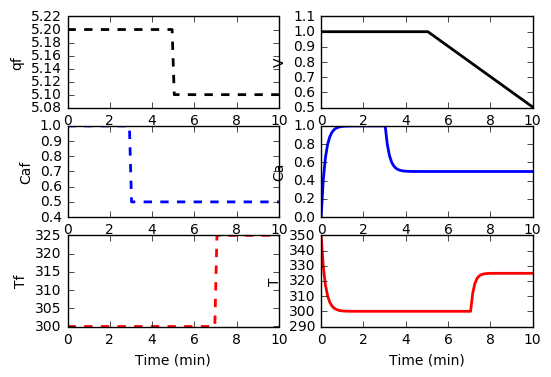

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# define vessel model
def vessel(x,t,q,qf,Caf,Tf):
    # parameters
    # q = outlet flowrate
    # qf = feed fowrate
    # Caf = feed concentration of A
    # Tf = feed temperature
    
    # variables
    V = x[0]
    Ca = x[1]
    T = x[2]
    ra = 0.0
    # Mass Balance
    dVdt = qf - q
    
    # Species Balance
    dCadt = (Caf*qf - Ca*q)/V + ra - Ca*dVdt/V
    
    # Energy Balance
    dTdt = (qf*Tf - q*T)/V - T*dVdt/V
    
    return [dVdt, dCadt, dTdt]

# time steps
t = np.linspace(0,10,100)

# Initial conditions
V0 = 1.0
Ca0 = 0.0
T0 = 350
y0 = [V0,Ca0,T0]

# Boundary Conditions
# Feed flowrate
qf = np.ones(100)*5.2
qf[50:] = 5.1

# Outlet flowrate
q = np.ones(100)*5.2

# Feed concentration of A
Caf = np.ones(100)*1.0
Caf[30:] = 0.5

# Feed temperature
Tf = np.ones(100)*300
Tf[70:] = 325

# Store the data
V = np.ones(100)*V0
Ca = np.ones(100)*Ca0
T = np.ones(100)*T0

for i in range(99):
    delta_t = [t[i],t[i+1]]
    inputs = (q[i],qf[i],Caf[i],Tf[i])
    y = odeint(vessel,y0,delta_t,args=inputs)
    V[i+1] = y[-1][0]
    Ca[i+1] = y[-1][1]
    T[i+1] = y[-1][2]
    y0 = y[-1]

plt.figure()

plt.subplot(3,2,1)
plt.plot(t,qf,'k--',linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('qf')

plt.subplot(3,2,2)
plt.plot(t,V,'k-',linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('V')

plt.subplot(3,2,3)
plt.plot(t,Caf,'b--',linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('Caf')

plt.subplot(3,2,4)
plt.plot(t,Ca,'b-',linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('Ca')

plt.subplot(3,2,5)
plt.plot(t,Tf,'r--',linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('Tf')

plt.subplot(3,2,6)
plt.plot(t,T,'r-',linewidth=2)
plt.xlabel('Time (min)')
plt.ylabel('T')

plt.show()

    
    

    
    